In [69]:
import numpy as np
import pandas as pd

In [70]:
datapath = './data/diagnosis2.data'

original_data = pd.read_csv(datapath, sep='\t', dtype='unicode', \
                            names=['temperature','nausea','lumbar_pain','urine_pushing',\
                                  'micturition_pains', 'burning_of_urethra','inflamation','nephritis'])
original_data.shape

(120, 8)

In [71]:
original_data.columns

Index(['temperature', 'nausea', 'lumbar_pain', 'urine_pushing',
       'micturition_pains', 'burning_of_urethra', 'inflamation', 'nephritis'],
      dtype='object')

In [72]:
original_data['temperature'] = original_data['temperature'].apply(lambda x: x.replace(',','.'))
original_data.head()

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflamation,nephritis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no


In [73]:
from sklearn import preprocessing

le_nausea = preprocessing.LabelEncoder()# label encoder전화번호부 역할 0은 no 1은 yes
le_nausea.fit(original_data['nausea'])#

print(le_nausea.classes_)#멤버변수 찍으니 no yes
print(le_nausea.transform(['no','yes','yes']))#리스트를 숫자<영어
print(le_nausea.inverse_transform([0, 0, 1]))#숫자>영어

['no' 'yes']
[0 1 1]
['no' 'no' 'yes']


In [74]:
dicted_data = original_data.copy() #실제로 적용한것임
dicted_data['nausea'] = le_nausea.transform(original_data['nausea'])

dicted_data.head()

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflamation,nephritis
0,35.5,0,yes,no,no,no,no,no
1,35.9,0,no,yes,yes,yes,yes,no
2,35.9,0,yes,no,no,no,no,no
3,36.0,0,no,yes,yes,yes,yes,no
4,36.0,0,yes,no,no,no,no,no


In [75]:
tmp = ['lumbar_pain', 'urine_pushing', 'micturition_pains', 'burning_of_urethra', 'inflamation', 'nephritis']

les = {'nausea': le_nausea}#les 딕셔너리 만들고

for x in tmp:#각각의 피쳐(tmp)를 돌면서 label인코더 생성해서 les에 넣어준다.
    les[x] = preprocessing.LabelEncoder()
    dicted_data[x] = les[x].fit_transform(original_data[x])
    
dicted_data.head()

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflamation,nephritis
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0


In [76]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

y= dicted_data['inflamation']

#features = ['temperature']
features = ['urine_pushing']
x= dicted_data[features]

model = DecisionTreeClassifier(min_samples_split=20, random_state=99)

In [77]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: inflamation, dtype: int64

In [78]:
x.head()

,urine_pushing
0,0
1,1
2,0
3,1
4,0


In [79]:
model.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

['no' 'yes']


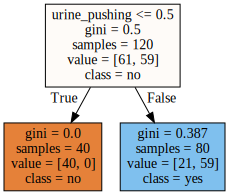

In [80]:
from graphviz import Source
from sklearn.tree import export_graphviz
from IPython.display import SVG

inflamation_labels = les['inflamation'].classes_#les딕셔너리에서 infla에 대한것 인코더
print(inflamation_labels)

graph = Source(tree.export_graphviz(model, out_file=None, \
                                   feature_names=features, class_names=inflamation_labels, \
                                   filled = True))
display(SVG(graph.pipe(format='svg')))

In [81]:
pred_y = model.predict(x)#sklearn 머신러닝에서 많이씀,모델을쓰면 predict 주어진x(학습에 썼었다)를 받아서 y예측값(결과값)을 받아서 리턴
pred_y_prob = model.predict_proba(x)#주어진 데이터 x 대해 확률값 리턴해서 받아준다.
print(np.shape(pred_y))#프레드와이는 120개가 있어(x에 120개 있었다는것)
print(np.shape(pred_y_prob))#120개x2 (yes일확률, no일확률)

(120,)
(120, 2)


In [82]:
print('정답:', y[0])
print('예측:', pred_y[0])
print('정답:', pred_y_prob[0])#클래스 별 확률
print(model.classes_)

정답: 0
예측: 0
정답: [1. 0.]
[0 1]


In [83]:
mean_accuracy = model.score(x, y)#스코어 계산할때 인자 x,y 
#(예측값아니라 정답인데 높지않다)
print(mean_accuracy)#70프로 정확도 템퍼러쳐로만 인프라 예측해서 70프로임

0.825


In [84]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

y= dicted_data['inflamation']

features = ['lumbar_pain', 'urine_pushing', 'micturition_pains', 'burning_of_urethra', 'nausea', 'temperature']
x= dicted_data[features]#temperature 만아니라 모든것에대해 inlamation 을 예측하여 정확도 모델링

model = DecisionTreeClassifier(min_samples_split=20, random_state=99)

In [85]:
model.fit(x, y)
mean_accuracy = model.score(x, y)
print(mean_accuracy)

1.0


['no' 'yes']


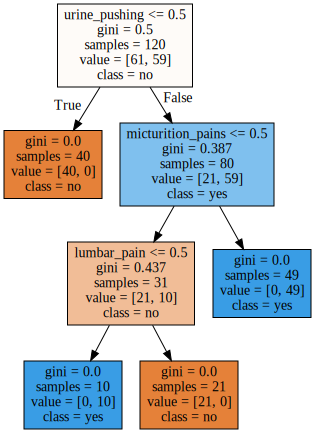

In [86]:
from graphviz import Source
from sklearn.tree import export_graphviz
from IPython.display import SVG

inflamation_labels = les['inflamation'].classes_#les딕셔너리에서 infla에 대한것 인코더
print(inflamation_labels)

graph = Source(tree.export_graphviz(model, out_file=None, \
                                   feature_names=features, class_names=inflamation_labels, \
                                   filled = True))
display(SVG(graph.pipe(format='svg')))#주황색 no 파란색 yes  마지막 주황색 노드 gini 피쳐의 기여도   
#학습데이터 21개중에서 no에는 21개클래스 yes는 0,  엔트로피 0(완벽한 학습이 된 case)
#overffting 의심해봐야한다. 

In [87]:
print(features)
print(model.feature_importances_)

['lumbar_pain', 'urine_pushing', 'micturition_pains', 'burning_of_urethra', 'nausea', 'temperature']
[0.22586919 0.48360656 0.29052425 0.         0.         0.        ]


In [94]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split

features = ['lumbar_pain', 'urine_pushing', 'micturition_pains', 'burning_of_urethra', 'nausea', 'temperature']

train_d, test_d = train_test_split(dicted_data, test_size=0.1)#테스트용0.1 트레이닝 0.9 학습 테스트 스프릿
#위에 두개는 모양새가 똑같다. 큰테이블이 dicted_data  여러칼럼중에 0.9 트레이닝
#
train_y = train_d['inflamation']#리스트들의 세로(inlfamation)한줄을 train y 에 넣는다.
train_x = train_d[features]#나머지를 y에

test_y = test_d['inflamation']#실제로 내놓을때 새로운 데이터를 측정하기 위해서 구분한다. 
test_x = test_d[features]



In [95]:
model = DecisionTreeClassifier(min_samples_split=2, random_state=99)#파라메터2개, 파라메터를 바꾸는 의미:최소 샘플의 수 복잡
model.fit(train_x, train_y)

mean_accuracy_for_train = model.score(train_x, train_y)#비교해서 나온 답
print(mean_accuracy_for_train)

mean_accuracy_for_test = model.score(test_x, test_y)
print(mean_accuracy_for_test)

1.0
1.0


In [97]:
import pickle # 메모리를 통째로 그냥 파일에 넣어버리는것이다. 
modelpath = './model/prac001.model'
with open(modelpath, 'wb') as f:
    pickle.dump(model, f)

In [98]:
modelpath='./model/prac001.model'
with open(modelpath, 'rb') as f:#rb로 읽어와서
    model_loaded = pickle.load(f)#인자로 file만준다 이거를 모델 로드에 넣는다.   객체타입을 모르고 통째로 가지고 온다. 
    
mean_accuracy_for_test = model_loaded.score(test_x, test_y)#score 있으면 쓰고 없으면 error 난다. 
print(mean_accuracy_for_test)

1.0
